In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


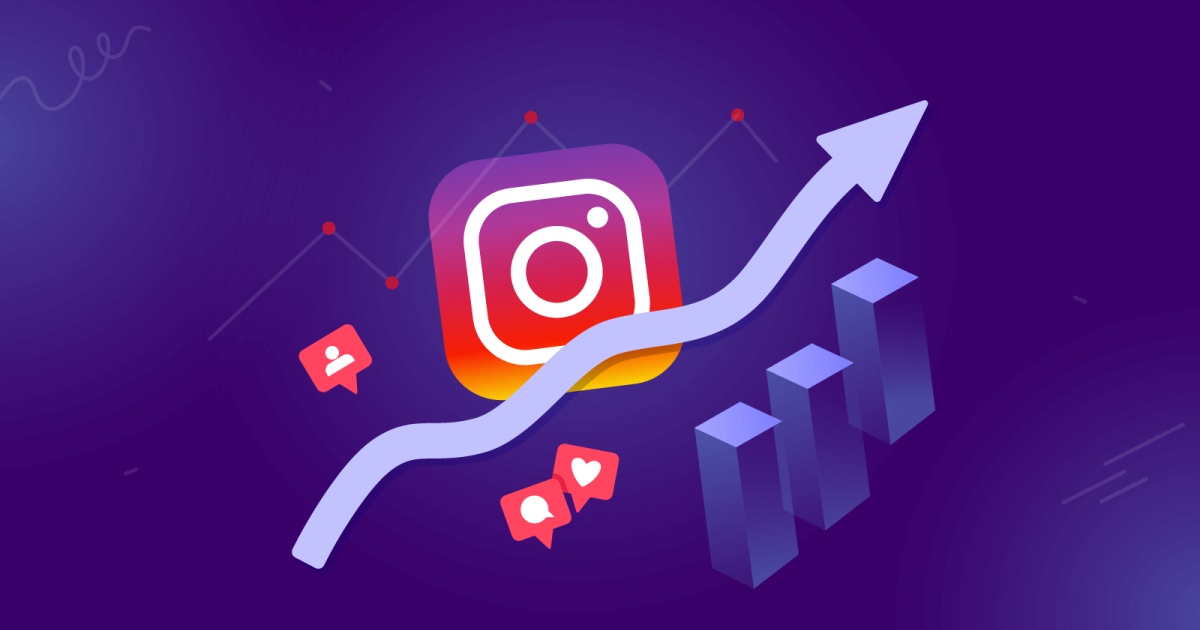

In [1]:
%matplotlib inline
from IPython.display import Image
Image(r"C:\Users\91931\Downloads\Images for projects\638f5259b70a090cfdf8e1f8_Top 10 Instagram Metrics You Need To Know.jpg")

In [2]:
data = pd.read_csv(r"C:\Users\91931\Downloads\Intern\Dataset\top_insta_influencers_data.csv")

In [38]:
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,like_follower_ratio,post_follower_ratio,avg_likes_ratio
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain,60.949979,0.000007,0.018285
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States,156.744948,0.000019,0.022665
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States,33.557047,0.000005,0.018092
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States,37.413948,0.000020,0.005687
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States,60.449575,0.000017,0.010632


In [4]:
data.shape

(200, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [6]:
data.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [7]:
data.isnull().value_counts()

rank   channel_info  influence_score  posts  followers  avg_likes  60_day_eng_rate  new_post_avg_like  total_likes  country
False  False         False            False  False      False      False            False              False        False      138
                                                                                                                    True        62
Name: count, dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
# Fill missing numerical values with median and categorical values with mode
# for column in data.columns:
#     if data[column].dtype == 'object':
#       data[column].fillna(data[column].mode()[0], inplace=True)
#     else:
#       data[column].fillna(data[column].median(), inplace=True)

In [10]:
data.isnull().value_counts()

rank   channel_info  influence_score  posts  followers  avg_likes  60_day_eng_rate  new_post_avg_like  total_likes  country
False  False         False            False  False      False      False            False              False        False      138
                                                                                                                    True        62
Name: count, dtype: int64

In [11]:
# Convert necessary columns to appropriate data types.

# Function to convert '12m', '16k', 12% etc., to integers
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
convert_column = ['total_likes', 'posts', 'followers','avg_likes', '60_day_eng_rate', 'new_post_avg_like']
data[convert_column] = data[convert_column].replace(replace,regex=True).astype(float)
data[convert_column]




,total_likes,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like
0,2.900000e+10,3300.0,475800000.0,8700000.0,1.39,6500000.0
1,5.740000e+10,6900.0,366200000.0,8300000.0,1.62,5900000.0
2,6.000000e+09,890.0,357300000.0,6800000.0,1.24,4400000.0
3,1.150000e+10,1800.0,342700000.0,6200000.0,0.97,3300000.0
4,1.250000e+10,6800.0,334100000.0,1900000.0,0.20,665300.0
...,...,...,...,...,...,...
195,1.400000e+09,2300.0,33200000.0,623800.0,1.40,464700.0
196,1.500000e+09,3800.0,33200000.0,390400.0,0.64,208000.0
197,1.492000e+08,770.0,33200000.0,193300.0,0.26,82600.0
198,1.700000e+09,2300.0,33000000.0,719600.0,1.42,467700.0


In [12]:
data.describe()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,199.000000,2.000000e+02,2.000000e+02
mean,100.500000,81.820000,3499.850000,7.740950e+07,1.787104e+06,1.902010,1.208132e+06,3.658112e+09
std,57.879185,8.878159,3475.828158,7.368727e+07,2.193359e+06,3.329719,1.858322e+06,5.561939e+09
min,1.000000,22.000000,10.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07
25%,50.750000,80.000000,947.500000,4.000000e+07,5.044000e+05,0.410000,1.957500e+05,9.968500e+08
50%,100.500000,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.880000,5.321500e+05,2.000000e+09
75%,150.250000,86.000000,5025.000000,6.890000e+07,2.100000e+06,2.035000,1.325000e+06,3.900000e+09
max,200.000000,93.000000,17500.000000,4.758000e+08,1.540000e+07,26.410000,1.260000e+07,5.740000e+10


# Exploratory Data Analysis

 


In [13]:
country = data['country'].value_counts()
country

country
United States             66
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Canada                     3
Colombia                   3
Netherlands                2
Turkey                     2
Mexico                     2
Uruguay                    1
Italy                      1
United Arab Emirates       1
Puerto Rico                1
Australia                  1
CÃ´te d'Ivoire             1
Anguilla                   1
Sweden                     1
Switzerland                1
British Virgin Islands     1
Czech Republic             1
Germany                    1
Russia                     1
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Spain'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Uruguay'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Colombia'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'United Arab Emirates'),
  Text(15, 0, 'Puerto Rico'),
  Text(16, 0, "CÃ´te d'Ivoire"),
  Text(17, 0, 'Anguilla'),
  Text(18, 0, 'Switzerland'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'British Virgin Islands'),
  Text(21, 0, 'Czech Republic'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Germany'),
  Text(24, 0, 'Russia')])

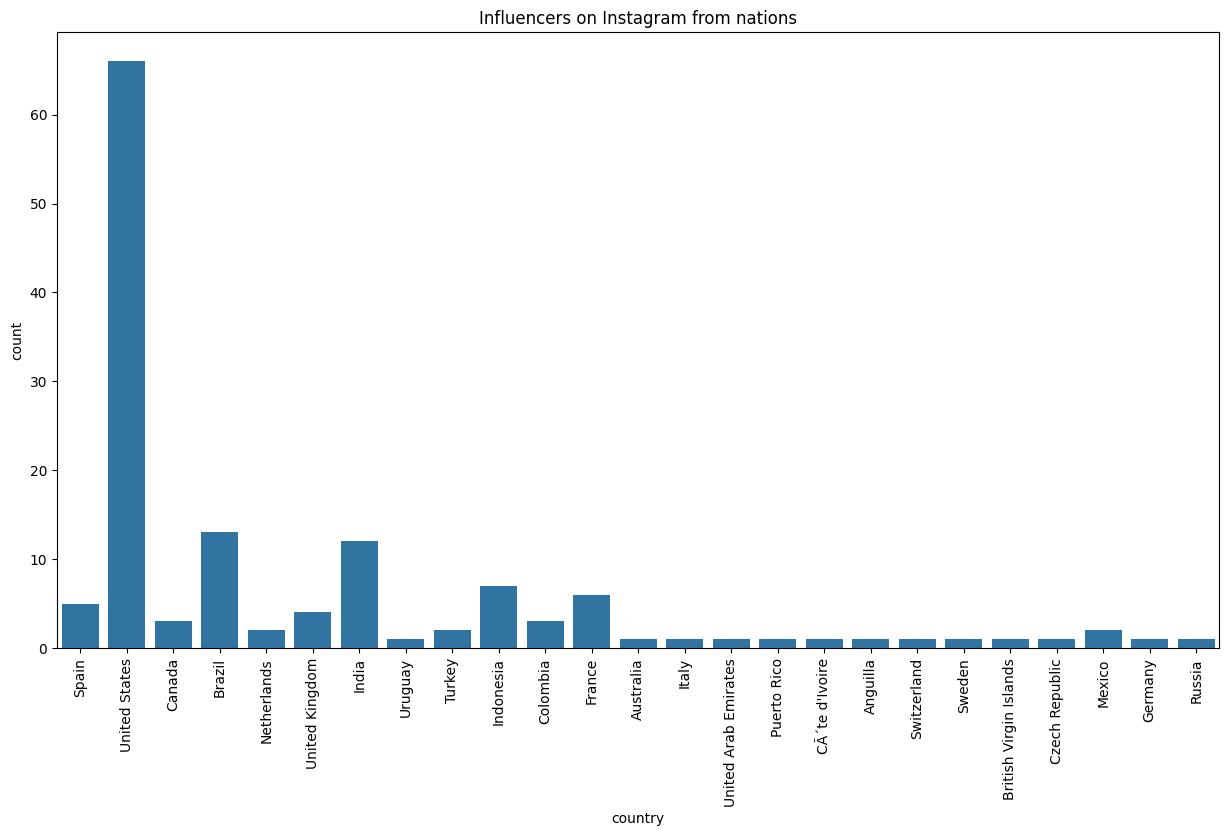

In [14]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.title('Influencers on Instagram from nations')
sns.countplot(x=data["country"])
plt.xticks(rotation=90)

In [15]:
# Filtering influencers with over 1 million followers
highest_follower=data[data['followers']>1_000_000]
highest_follower


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09,United States
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09,France
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08,Brazil
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42,467700.0,1.700000e+09,United States


In [16]:
high_engagement=data[data['60_day_eng_rate'] > 5]
high_engagement

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
32,33,billieeilish,73,690.0,105200000.0,8500000.0,5.02,5200000.0,5.900000e+09,NaN
38,39,lalalalisa_m,70,870.0,80900000.0,5800000.0,9.00,7200000.0,5.100000e+09,NaN
49,50,jennierubyjane,76,860.0,68900000.0,5100000.0,8.36,5700000.0,4.400000e+09,NaN
53,54,tomholland2013,77,1200.0,67700000.0,5400000.0,10.83,7300000.0,6.600000e+09,NaN
56,57,bts.bighitofficial,78,1200.0,66900000.0,4100000.0,5.40,3600000.0,4.900000e+09,Uruguay
64,65,sooyaaa__,82,830.0,62900000.0,4500000.0,9.43,5900000.0,3.800000e+09,NaN
69,70,roses_are_rosie,82,820.0,61800000.0,4600000.0,9.72,6000000.0,3.800000e+09,NaN
75,76,milliebobbybrown,80,280.0,57600000.0,4000000.0,8.63,5000000.0,1.100000e+09,United States
78,79,karolg,83,3300.0,55600000.0,3100000.0,10.25,5700000.0,1.010000e+10,India
83,84,zacefron,86,660.0,54500000.0,2300000.0,8.18,4400000.0,1.500000e+09,United States


In [17]:
top10_er=data.drop(["rank","influence_score","posts","avg_likes","new_post_avg_like","total_likes","country"],axis=1)
top10_er.head(10)

,channel_info,followers,60_day_eng_rate
0,cristiano,475800000.0,1.39
1,kyliejenner,366200000.0,1.62
2,leomessi,357300000.0,1.24
3,selenagomez,342700000.0,0.97
4,therock,334100000.0,0.20
5,kimkardashian,329200000.0,0.88
6,arianagrande,327700000.0,1.20
7,beyonce,272800000.0,0.76
8,khloekardashian,268300000.0,0.35
9,justinbieber,254500000.0,0.59


In [18]:
data.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       1
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [19]:
# Fill missing engagement rates with the average engagement rate
data['60_day_eng_rate'].fillna(data['60_day_eng_rate'].mean(), inplace=True)

C:\Users\91931\AppData\Local\Temp\ipykernel_31124\3879004543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['60_day_eng_rate'].fillna(data['60_day_eng_rate'].mean(), inplace=True)


In [20]:
data.dropna(inplace=True)
data

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09,United States
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09,France
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08,Brazil
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42,467700.0,1.700000e+09,United States


In [21]:
country= data['country'].value_counts()[:20].to_list()
name_countries = data['country'].value_counts().index[:20].to_list()
name_countries.append("Others")
max20 = sum(country)
others = len(data)- max20
country.append(others)

C:\Users\91931\AppData\Local\Temp\ipykernel_31124\4029492909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country, y=name_countries, palette='viridis')


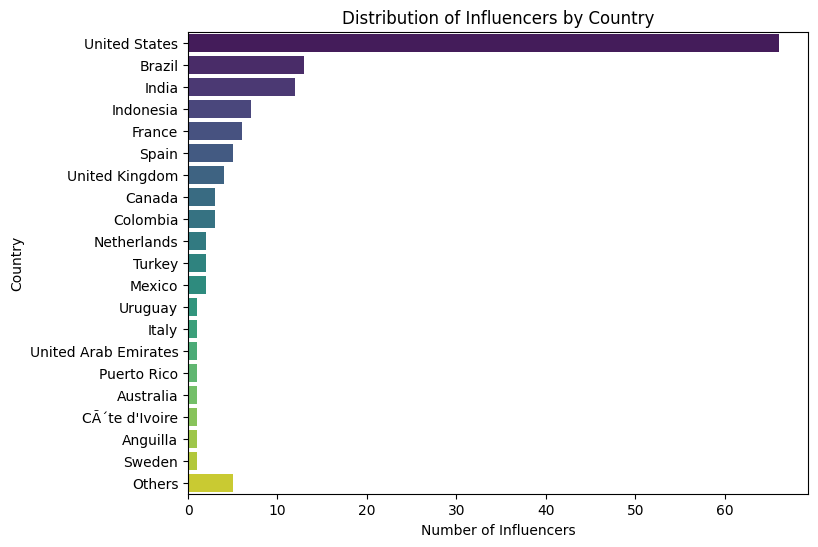

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x=country, y=name_countries, palette='viridis')
plt.title('Distribution of Influencers by Country')
plt.xlabel('Number of Influencers')
plt.ylabel('Country')
plt.show()

In [23]:
 # Display summary statistics for numeric columns
print(data[['influence_score', 'followers', 'avg_likes','60_day_eng_rate', 'new_post_avg_like']].describe())

       influence_score     followers     avg_likes  60_day_eng_rate  \
count       138.000000  1.380000e+02  1.380000e+02       138.000000   
mean         81.652174  8.372609e+07  1.492658e+06         1.331522   
std           8.720855  8.103318e+07  1.537165e+06         1.796447   
min          41.000000  3.280000e+07  6.510000e+04         0.010000   
25%          79.250000  4.100000e+07  4.231750e+05         0.335000   
50%          83.000000  5.270000e+07  1.100000e+06         0.680000   
75%          86.000000  7.032500e+07  1.900000e+06         1.510000   
max          93.000000  4.758000e+08  8.700000e+06        10.250000   

       new_post_avg_like  
count       1.380000e+02  
mean        9.673341e+05  
std         1.320879e+06  
min         0.000000e+00  
25%         1.810250e+05  
50%         4.245500e+05  
75%         1.200000e+06  
max         6.500000e+06  


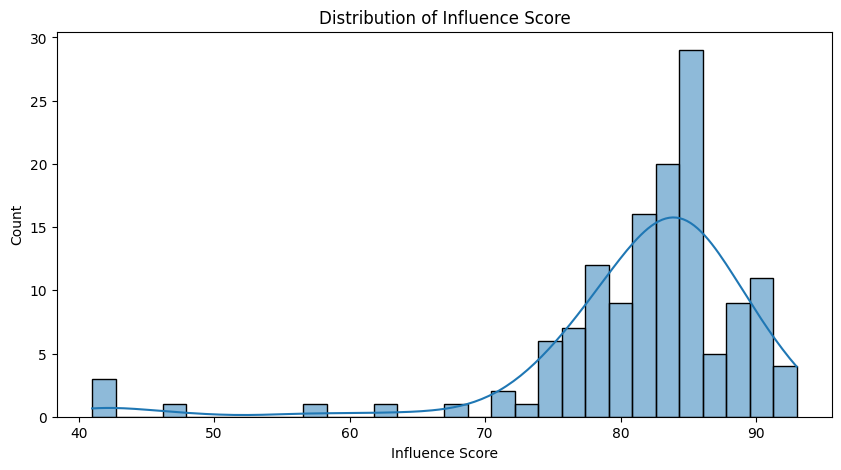

In [24]:
# Distribution of Influence Score

plt.figure(figsize=(10, 5))
sns.histplot(data['influence_score'], bins=30, kde=True)
plt.title('Distribution of Influence Score')
plt.xlabel('Influence Score')
plt.show()

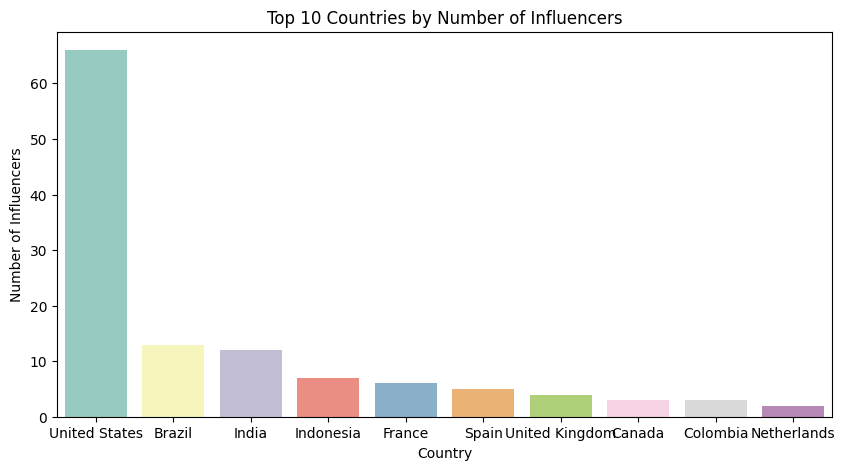

In [25]:
# Most Active Countries

top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values,hue=top_countries.index,legend=False,
palette="Set3")
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.show()

# Feature Engineering
 To improve our model’s performance, let’s create a few additional features that might
 be helpful predictors

In [26]:
# Creating engagement-related features
data['like_follower_ratio'] = data['total_likes'] / data['followers']
data['post_follower_ratio'] = data['posts'] / data['followers']
data['avg_likes_ratio'] = data['avg_likes'] / data['followers']

# Model Building
 Objective: Predict influence_score using other variables.

 Split the data into training and testing sets

 Scale the features for optimal performance
 
 Train a regression model to predict the influence score
 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
 # Define feature columns and target variable
X = data[['followers', 'avg_likes', 'new_post_avg_like','60_day_eng_rate', 'like_follower_ratio','post_follower_ratio']]
y = data['influence_score']


In [29]:
 # Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [30]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 47.18427499999999
R^2 Score: -0.821661082385384


# Model Interpretation and Feature Importance


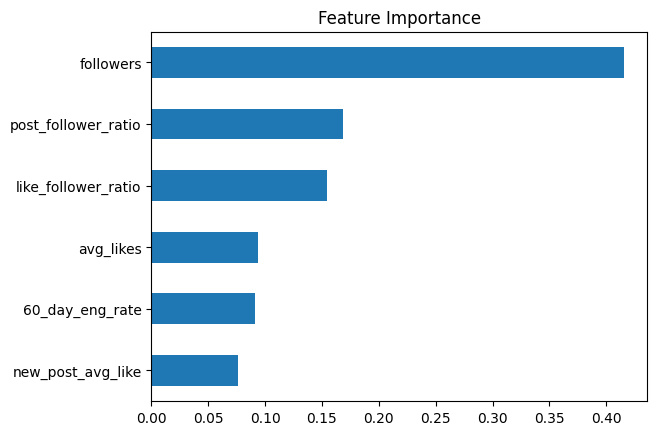

In [33]:
# Display feature importances
feature_importances = pd.Series(model.feature_importances_,
index=X.columns)
feature_importances.sort_values().plot(kind='barh',
title='Feature Importance')
plt.show()


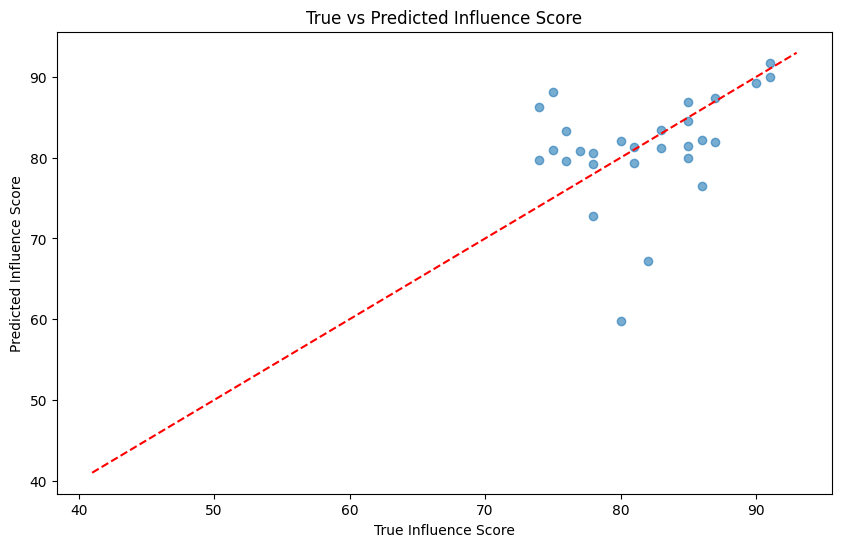

In [34]:
# Visualizing Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--',color='red')
plt.xlabel('True Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('True vs Predicted Influence Score')
plt.show()  



# Final Observations and Summary
Top Influential Factors: Feature importance analysis indicates which features most influence the influence_score.

Model Performance: With the achieved R² score, assess the accuracy of the modelin predicting an influencer's influence score based on follower metrics.

Business Insights: Using insights on top-engaging influencers by country and engagement rates, businesses can strategize influencer collaborations for marketing.
